In [2]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("../data/taylor_swift_lyrics.csv", index_col=[0])
df.head()

,Song,Artist(s),Writer(s),Album,Year,Lyrics,Type
0,The 1,Taylor Swift,Taylor Swift Aaron Dessner,Folklore,2020,"I'm doing good, I'm on some new shit\nBeen say...",Solo
1,22,Taylor Swift,Taylor Swift Max Martin Shellback,Red and Red (Taylor's Version),2012 and 2021,It feels like a perfect night\nTo dress up lik...,Solo
2,Afterglow,Taylor Swift,Taylor Swift Louis Bell Adam King Feeney,Lover,2019,"I blew things out of proportion, now you're bl...",Solo
3,The Alcott,The National featuring Taylor Swift,Matt Berninger Aaron Dessner Taylor Swift,First Two Pages of Frankenstein,2023,I get myself twisted in threads\nTo meet you a...,Feature
4,All of the Girls You Loved Before,Taylor Swift,Taylor Swift Louis Bell Adam King Feeney,Non-album promotional single[a],2023,When you think of all the late nights\nLame fi...,Solo


In [9]:
text_solo = "\n".join(df[df["Type"]=="Solo"]["Lyrics"])
text_feature = "\n".join(df[df["Type"]=="Feature"]["Lyrics"])
text_cover = "\n".join(df[df["Type"]=="Cover"]["Lyrics"])
text_songwriting = "\n".join(df[df["Type"]=="Songwriting Credit"]["Lyrics"])

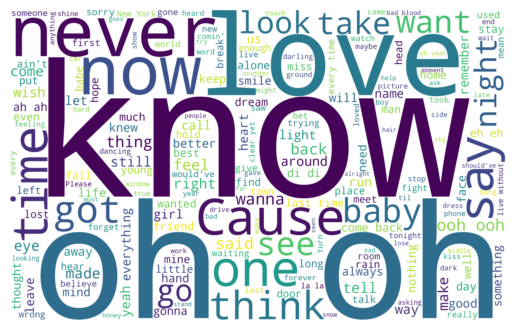

In [16]:
text_songs = text_solo + "\n" + text_feature

wordcloud = WordCloud(width=2560, height=1600, background_color="white").generate(text_songs)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('lyrics_solo_feature_simple.png', bbox_inches='tight')

(-0.5, 2559.5, 1599.5, -0.5)

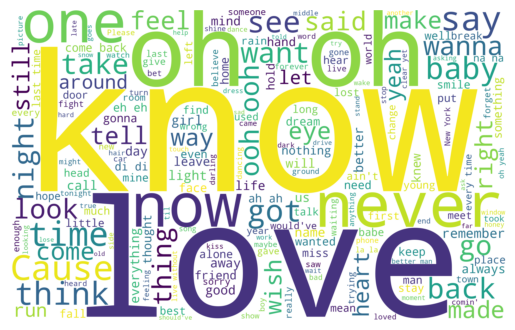

In [17]:
text_all = text_solo + "\n" + text_feature + "\n" + text_cover + "\n" + text_songwriting

wordcloud = WordCloud(width=2560, height=1600, background_color="white").generate(text_all)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 1219.5, 1306.5, -0.5)

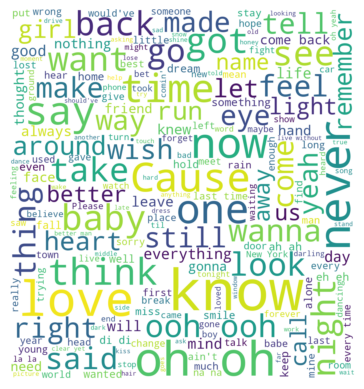

In [23]:
import numpy as np
from PIL import Image

# read the mask image
taylor_mask = np.array(Image.open("rep_cover_filled_transparent.png"))

wordcloud = WordCloud(mask=taylor_mask, background_color="white", max_font_size=200).generate(text_all)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

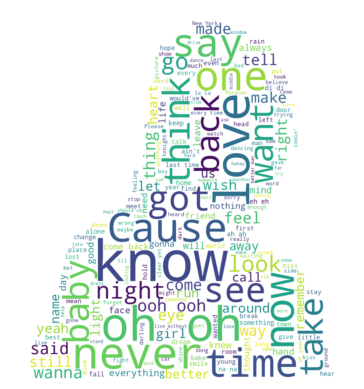

In [37]:
# read the mask image
taylor_mask = np.array(Image.open("rep_cover_filled.png"))

wordcloud = WordCloud(mask=taylor_mask, background_color="white", max_font_size=200).generate(text_all)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
wordcloud.to_file("lyrics_all_rep.png")

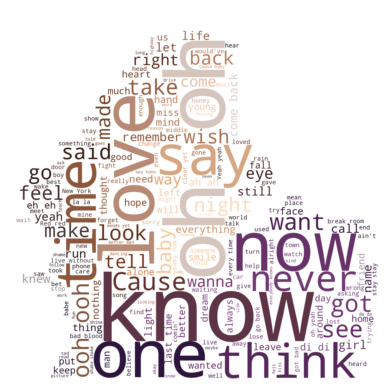

In [36]:
from wordcloud import WordCloud, ImageColorGenerator

# read the mask image
taylor_mask = np.array(Image.open("speak_now_tv_cover_filled.png"))

text_songwriting = text_solo + "\n" + text_feature + "\n" + text_songwriting

wordcloud = WordCloud(mask=taylor_mask, background_color="white").generate(text_songwriting)

image_colors = ImageColorGenerator(taylor_mask)
wordcloud.recolor(color_func=image_colors)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
wordcloud.to_file("lyrics_songwriting_speak_now_tv.png")